# Deep Neural Network
Zehua Wang, biostat625 final project

## Imports

In [116]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [122]:
# path
ROOT_DIR = os.path.abspath("../")

## Data Cleaning

In [2]:
# Date : year-month-day
# Rented Bike count - Count of bikes rented at each hour
# Hour - Hour of he day
# Temperature-Temperature in Celsius
# Humidity - %
# Windspeed - m/s
# Visibility - 10m
# Dew point temperature - Celsius
# Solar radiation - MJ/m2
# Rainfall - mm
# Snowfall - cm
# Seasons - Winter, Spring, Summer, Autumn
# Holiday - Holiday/No holiday
# Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [49]:
# load data
data_path = os.path.join(ROOT_DIR, 'data/SeoulBikeData.csv')
bike_data = pd.read_csv(data_path, encoding = 'unicode_escape')
# add year, month, day, and days of week
bike_data['Date'] = pd.to_datetime(bike_data['Date'])
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Month'] = pd.DatetimeIndex(bike_data['Date']).month
bike_data['Day'] = pd.DatetimeIndex(bike_data['Date']).day
bike_data['DWeek'] = pd.DatetimeIndex(bike_data['Date']).weekday
bike_data.columns = (['Date','Rented_Bike_Count', 'Hour', 'Temperature',
                      'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temp',
                      'Solar_Rad', 'Rainfall', 'Snowfall', 'Seasons', 
                      'Holiday', 'Funct_Day','Year', 'Month', 'Day', 'DWeek'])
bike_data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Funct_Day,Year,Month,Day,DWeek
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3


In [50]:
bike_data['Seasons'] = pd.factorize(bike_data['Seasons'])[0]
bike_data['Funct_Day'] = pd.factorize(bike_data['Funct_Day'])[0]
bike_data['Holiday'] = pd.factorize(bike_data['Holiday'])[0]
bike_data['Rented_Bike_Count'] = bike_data['Rented_Bike_Count'].astype(float)

In [51]:
bike_data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Funct_Day,Year,Month,Day,DWeek
0,2017-01-12,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,2017,1,12,3
1,2017-01-12,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,2017,1,12,3
2,2017-01-12,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,2017,1,12,3
3,2017-01-12,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,2017,1,12,3
4,2017-01-12,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,2017,1,12,3


In [52]:
## split data into a train and test set
bike_data = bike_data.sample(frac = 1, random_state = 625).\
                reset_index(drop = True)
data_size = bike_data.shape[0]
trainset = bike_data.iloc[:round(data_size*0.7), 1:].reset_index(drop = True)
valset = bike_data.iloc[round(data_size*0.7):round(data_size*0.8), 1:].reset_index(drop = True)
testset = bike_data.iloc[round(data_size*0.8):, 1:].reset_index(drop = True)

## Neural Network

In [123]:
CURRENT_DIR = os.path.join(ROOT_DIR, "NeuralNetwork")
WEIGHT_DIR = os.path.join(CURRENT_DIR, "weights")

In [89]:
# data prepare
X_train = trainset.iloc[:, 1:]
y_train = trainset.iloc[:, 0]
y_train.astype(float)
X_val = valset.iloc[:, 1:]
y_val = valset.iloc[:, 0]
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.shuffle(len(X_train)).batch(4)
val = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val = train.shuffle(len(X_train)).batch(1)

In [90]:
# model 1
mod1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1], )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(8, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
])
mod1.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
)
mod1_history = mod1.fit(train, epochs = 100, validation_data = val)
mod1_loss = mod1.evaluate(val)
print('Model 1 Loss {}'.format(mod1_loss))

Epoch 1/100
1533/1533 [==============================] - 6s 4ms/step - loss: 389494.1875 - val_loss: 368365.0938
Epoch 2/100
1533/1533 [==============================] - 6s 4ms/step - loss: 352376.6875 - val_loss: 332684.4688
Epoch 3/100
1533/1533 [==============================] - 6s 4ms/step - loss: 313928.2812 - val_loss: 294507.8438
Epoch 4/100
1533/1533 [==============================] - 6s 4ms/step - loss: 279668.3125 - val_loss: 265978.0938
Epoch 5/100
1533/1533 [==============================] - 6s 4ms/step - loss: 259681.1875 - val_loss: 250004.1875
Epoch 6/100
1533/1533 [==============================] - 6s 4ms/step - loss: 247981.2188 - val_loss: 240604.5156
Epoch 7/100
1533/1533 [==============================] - 6s 4ms/step - loss: 238958.7344 - val_loss: 235391.4219
Epoch 8/100
1533/1533 [==============================] - 6s 4ms/step - loss: 233812.9844 - val_loss: 228909.3125
Epoch 9/100
1533/1533 [==============================] - 6s 4ms/step - loss: 228589.7188 - val_l

1533/1533 [==============================] - 7s 4ms/step - loss: 177559.3438 - val_loss: 172428.8750
Epoch 70/100
1533/1533 [==============================] - 6s 4ms/step - loss: 175645.4375 - val_loss: 176812.8750
Epoch 71/100
1533/1533 [==============================] - 7s 4ms/step - loss: 175346.2188 - val_loss: 171535.8594
Epoch 72/100
1533/1533 [==============================] - 7s 4ms/step - loss: 173795.4375 - val_loss: 172408.2969
Epoch 73/100
1533/1533 [==============================] - 7s 4ms/step - loss: 173084.7812 - val_loss: 168884.4062
Epoch 74/100
1533/1533 [==============================] - 7s 4ms/step - loss: 172674.2188 - val_loss: 169232.6094
Epoch 75/100
1533/1533 [==============================] - 7s 4ms/step - loss: 171341.0938 - val_loss: 167558.9688
Epoch 76/100
1533/1533 [==============================] - 7s 4ms/step - loss: 170364.2656 - val_loss: 166562.8750
Epoch 77/100
1533/1533 [==============================] - 7s 4ms/step - loss: 170126.5312 - val_loss:

In [91]:
print(mod1_history.history.keys())

dict_keys(['loss', 'val_loss'])


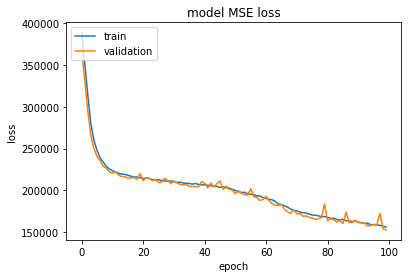

In [92]:
plt.plot(mod1_history.history['loss'])
plt.plot(mod1_history.history['val_loss'])
plt.title('model MSE loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [104]:
# model 2
mod2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1], )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])
mod2.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
)
mod2_history = mod2.fit(train, epochs = 500, validation_data = val)
mod2_loss = mod2.evaluate(val)
print('Model 2 Loss {}'.format(mod2_loss))

Epoch 1/500
1533/1533 [==============================] - 10s 6ms/step - loss: 351553.5938 - val_loss: 243979.3281
Epoch 2/500
1533/1533 [==============================] - 9s 6ms/step - loss: 253796.7812 - val_loss: 247437.9375
Epoch 3/500
1533/1533 [==============================] - 9s 6ms/step - loss: 236611.7500 - val_loss: 226750.0625
Epoch 4/500
1533/1533 [==============================] - 9s 6ms/step - loss: 238383.0469 - val_loss: 231681.6719
Epoch 5/500
1533/1533 [==============================] - 9s 6ms/step - loss: 227100.2031 - val_loss: 216156.8438
Epoch 6/500
1533/1533 [==============================] - 9s 6ms/step - loss: 226291.7188 - val_loss: 211123.8125
Epoch 7/500
1533/1533 [==============================] - 10s 6ms/step - loss: 219594.3906 - val_loss: 192596.5469
Epoch 8/500
1533/1533 [==============================] - 10s 6ms/step - loss: 218792.7500 - val_loss: 191198.5938
Epoch 9/500
1533/1533 [==============================] - 10s 6ms/step - loss: 208337.2188 - v

1533/1533 [==============================] - 10s 6ms/step - loss: 126213.9453 - val_loss: 153693.4688
Epoch 70/500
1533/1533 [==============================] - 9s 6ms/step - loss: 128133.9141 - val_loss: 111979.0703
Epoch 71/500
1533/1533 [==============================] - 10s 6ms/step - loss: 127220.5312 - val_loss: 135725.4219
Epoch 72/500
1533/1533 [==============================] - 10s 6ms/step - loss: 129540.0938 - val_loss: 108513.6875
Epoch 73/500
1533/1533 [==============================] - 10s 6ms/step - loss: 126675.5312 - val_loss: 105171.5469
Epoch 74/500
1533/1533 [==============================] - 10s 6ms/step - loss: 126322.9531 - val_loss: 129021.0859
Epoch 75/500
1533/1533 [==============================] - 10s 6ms/step - loss: 128411.7734 - val_loss: 157791.9531
Epoch 76/500
1533/1533 [==============================] - 10s 6ms/step - loss: 125568.9219 - val_loss: 117677.1016
Epoch 77/500
1533/1533 [==============================] - 9s 6ms/step - loss: 123234.1406 - va

1533/1533 [==============================] - 10s 6ms/step - loss: 93839.6875 - val_loss: 76160.6641
Epoch 141/500
1533/1533 [==============================] - 10s 6ms/step - loss: 91519.6484 - val_loss: 76181.3672
Epoch 142/500
1533/1533 [==============================] - 9s 6ms/step - loss: 93622.5938 - val_loss: 72390.7188
Epoch 143/500
1533/1533 [==============================] - 10s 6ms/step - loss: 95717.2891 - val_loss: 77682.7578
Epoch 144/500
1533/1533 [==============================] - 10s 6ms/step - loss: 99304.4453 - val_loss: 73478.1875
Epoch 145/500
1533/1533 [==============================] - 10s 6ms/step - loss: 95621.3125 - val_loss: 71826.8359
Epoch 146/500
1533/1533 [==============================] - 10s 6ms/step - loss: 90411.7344 - val_loss: 74597.1328
Epoch 147/500
1533/1533 [==============================] - 10s 6ms/step - loss: 93386.4453 - val_loss: 80175.2500
Epoch 148/500
1533/1533 [==============================] - 10s 6ms/step - loss: 89441.8672 - val_loss: 

Epoch 212/500
1533/1533 [==============================] - 10s 6ms/step - loss: 86107.0078 - val_loss: 137536.0781
Epoch 213/500
1533/1533 [==============================] - 10s 6ms/step - loss: 84103.7812 - val_loss: 100100.0703
Epoch 214/500
1533/1533 [==============================] - 10s 6ms/step - loss: 84683.8281 - val_loss: 63801.1992
Epoch 215/500
1533/1533 [==============================] - 9s 6ms/step - loss: 84727.1406 - val_loss: 65502.1797
Epoch 216/500
1533/1533 [==============================] - 9s 6ms/step - loss: 83671.7031 - val_loss: 108722.5156
Epoch 217/500
1533/1533 [==============================] - 9s 6ms/step - loss: 84618.7031 - val_loss: 66252.1875
Epoch 218/500
1533/1533 [==============================] - 10s 6ms/step - loss: 80651.6641 - val_loss: 68711.4141
Epoch 219/500
1533/1533 [==============================] - 10s 6ms/step - loss: 85316.5391 - val_loss: 61781.2148
Epoch 220/500
1533/1533 [==============================] - 10s 6ms/step - loss: 90092.82

Epoch 284/500
1533/1533 [==============================] - 10s 6ms/step - loss: 77113.2891 - val_loss: 61191.0664
Epoch 285/500
1533/1533 [==============================] - 10s 6ms/step - loss: 69972.1406 - val_loss: 56558.3242
Epoch 286/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76243.2109 - val_loss: 91906.8359
Epoch 287/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76935.9453 - val_loss: 53906.5312
Epoch 288/500
1533/1533 [==============================] - 10s 6ms/step - loss: 77838.4766 - val_loss: 56405.4883
Epoch 289/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76710.9922 - val_loss: 60612.9844
Epoch 290/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76164.1719 - val_loss: 67203.4062
Epoch 291/500
1533/1533 [==============================] - 10s 6ms/step - loss: 75852.9766 - val_loss: 57664.4453
Epoch 292/500
1533/1533 [==============================] - 10s 6ms/step - loss: 72876.88

Epoch 356/500
1533/1533 [==============================] - 9s 6ms/step - loss: 71410.9922 - val_loss: 54389.8867
Epoch 357/500
1533/1533 [==============================] - 10s 6ms/step - loss: 70249.9844 - val_loss: 52370.6875
Epoch 358/500
1533/1533 [==============================] - 10s 7ms/step - loss: 67809.2656 - val_loss: 56331.1211
Epoch 359/500
1533/1533 [==============================] - 10s 6ms/step - loss: 77376.2500 - val_loss: 59018.4062
Epoch 360/500
1533/1533 [==============================] - 10s 6ms/step - loss: 76280.0000 - val_loss: 68585.9766
Epoch 361/500
1533/1533 [==============================] - 10s 6ms/step - loss: 74245.8906 - val_loss: 48705.1680
Epoch 362/500
1533/1533 [==============================] - 10s 6ms/step - loss: 72568.8594 - val_loss: 62166.6172
Epoch 363/500
1533/1533 [==============================] - 10s 6ms/step - loss: 68511.2344 - val_loss: 80671.5234
Epoch 364/500
1533/1533 [==============================] - 10s 6ms/step - loss: 71955.570

1533/1533 [==============================] - 10s 6ms/step - loss: 65120.1211 - val_loss: 51262.3555
Epoch 428/500
1533/1533 [==============================] - 9s 6ms/step - loss: 67285.9297 - val_loss: 58135.6172
Epoch 429/500
1533/1533 [==============================] - 9s 6ms/step - loss: 63584.7734 - val_loss: 97248.8125
Epoch 430/500
1533/1533 [==============================] - 10s 6ms/step - loss: 64506.6875 - val_loss: 58366.1094
Epoch 431/500
1533/1533 [==============================] - 10s 6ms/step - loss: 63906.5469 - val_loss: 49444.3047
Epoch 432/500
1533/1533 [==============================] - 10s 6ms/step - loss: 68026.7266 - val_loss: 46363.5469
Epoch 433/500
1533/1533 [==============================] - 10s 6ms/step - loss: 65810.6172 - val_loss: 53753.4141
Epoch 434/500
1533/1533 [==============================] - 10s 6ms/step - loss: 67532.7422 - val_loss: 50359.5469
Epoch 435/500
1533/1533 [==============================] - 9s 6ms/step - loss: 68268.8672 - val_loss: 52

1533/1533 [==============================] - 10s 6ms/step - loss: 64876.4375 - val_loss: 48300.9531
Epoch 500/500
1533/1533 [==============================] - 5s 3ms/step - loss: 55950.0430
Model 2 Loss 55950.04296875


In [105]:
print(mod2_history.history.keys())

dict_keys(['loss', 'val_loss'])


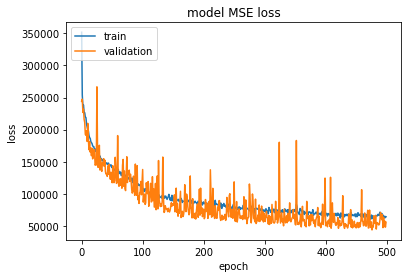

In [106]:
plt.plot(mod2_history.history['loss'])
plt.plot(mod2_history.history['val_loss'])
plt.title('model MSE loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()